<a href="https://colab.research.google.com/drive/1NYS-JHxCqv22lYa3sRc-FFxyr_XYVxhp?authuser=1" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment

To get full credit in this assignment you need to use `numpy`, `scipy` and `pandas` libraries. Sometimes you need to type equations - type equations in Latex math notation. To produce the plots you can use any plotting library you need.

PS1: We run the assignment through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions.

PS2: We are also monitoring solution websites and we will take action against anyone that uploads this to a solution website.

## Problem 1 (80 points)

A surgeon analyzes surgical videos and models events that occur. He describes the problem statement in [here](https://thomasward.com/simulating-correlated-data/). Your job is to replicate the solution in Python and demonstrate your understanding of the steps performed by  including adequate explanation of the code in either markdown cells or inline to the code.  You can insert as many markdown or code cells you need to perform the analysis.


## Question 1a (10 points)

Write the code for generating the `gs` variable. This is the simplest random variable of the problem and can be generated independent of the others.

gs is created as a normal distribution variable with an average of 7.25. It is created with np.random.normal. 10000 samples are generated. This variable has no correlation with the others.

In [ ]:
# Code here

import numpy as np
import pandas as pd
import scipy.stats as st
import math

gs = np.random.normal(7.25, 0.875, 10000)


## Question 1b (20 points)

We have three variables, `ak`, `pp`, and `ptime`. Write the code for generating these variables from Multivate Gaussian distribution and replicate the associated plots.



Explanation: Using numpy's multivariate_normal function I created normal distributions for three variables (ak, pp, and ptime). Their correlation matrix is represented by corr. 10000 samples were generated. multi_variate normal returns an array of tuples, so I used zip to split each tuple into its own array. Finally I converted the results into numpy arrays for future use.

For plotting I used pandas and created a dataframe containing each variable. From there I created scatter plots for each variable relationship.

<Axes: xlabel='pp', ylabel='ptime'>

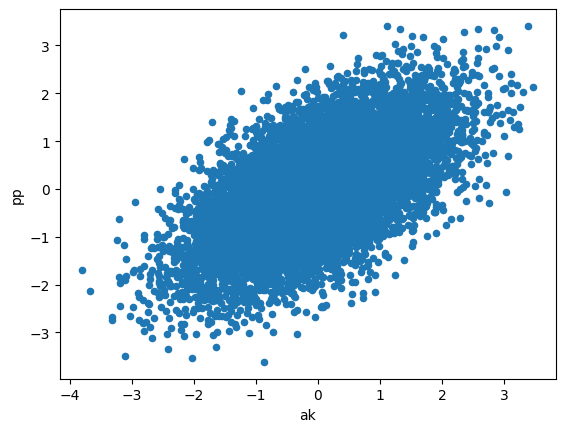

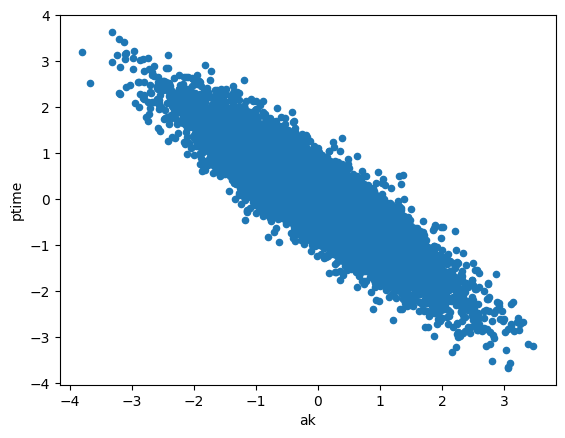

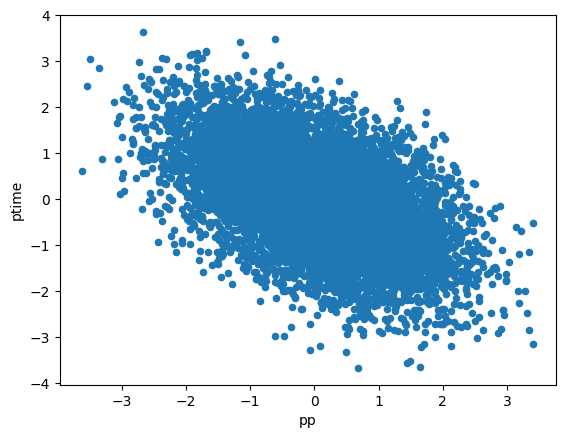

In [ ]:
# Code here



corr = [[1, 0.6, -0.9],
        [0.6, 1, -0.5],
        [-0.9, -0.5, 1]]


mv = np.random.multivariate_normal([0, 0, 0], corr, 10000)


ak, pp, ptime = zip(*mv)
ak = np.array(ak)
pp = np.array(pp)
ptime = np.array(ptime)


df = pd.DataFrame(mv, columns=['ak', 'pp', 'ptime'])

df.plot(x='ak', y='pp', kind='scatter')
df.plot(x='ak', y='ptime', kind='scatter')
df.plot(x='pp', y='ptime', kind='scatter')





## Question 1c (20 points)

Perform the probability inrtegral transform and replicate the associated plots.

Here the cdf function from scipy.stats.norm is used to apply the CDF to each variable. From there a dataframe is created and the relationships among the variables are graphed as scatterplots.

<Axes: xlabel='pp', ylabel='ptime'>

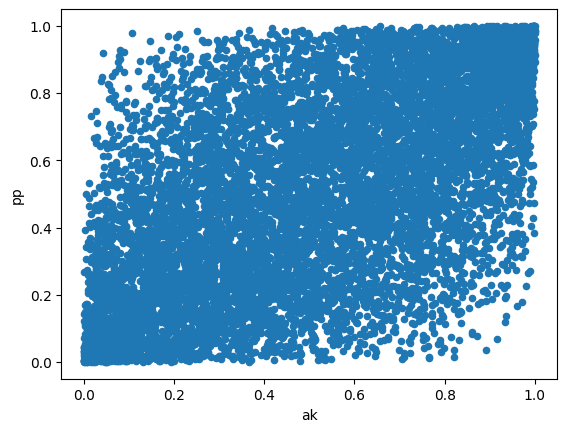

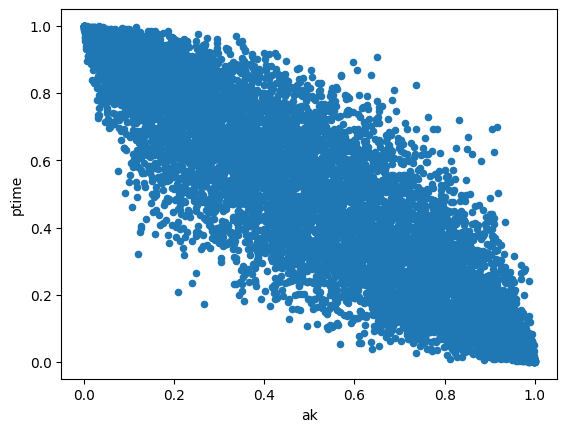

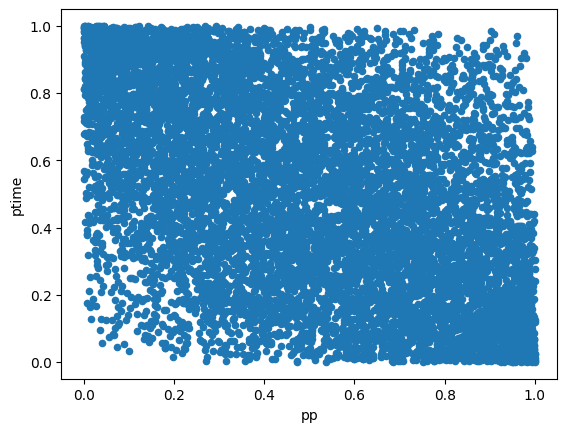

In [ ]:
# Code here


ak = st.norm.cdf(ak, 0, 1)
pp = st.norm.cdf(pp, 0, 1)
ptime = st.norm.cdf(ptime, 0, 1)

df = pd.DataFrame(data={'ak': ak, 'pp': pp,'ptime': ptime})
df.plot(x='ak', y='pp', kind='scatter')
df.plot(x='ak', y='ptime', kind='scatter')
df.plot(x='pp', y='ptime', kind='scatter')



## Question 1d (20 points)

Perform the inverse transform sampling.

The quantile function is the inverse of the cdf, so st.norm.ppf is applied to each variable. loc is used to set mean values and scale is used to adjust standard deviation as needed.

In [ ]:
#Code here


pAK = lambda x: st.norm.ppf(x, loc=5)
ak = pAK(ak)

pPP = lambda x: st.norm.ppf(x, loc=15)
pp = pPP(pp)

pPTIME = lambda x: st.norm.ppf(x, loc=120, scale=30)
ptime = pPTIME(ptime)




## Question 1e (10 points)

Replicate the final plot showcasing the correlations between the variables.


Scatterplots used to display the final results. Correlations remain the same.

<Axes: xlabel='pp', ylabel='ptime'>

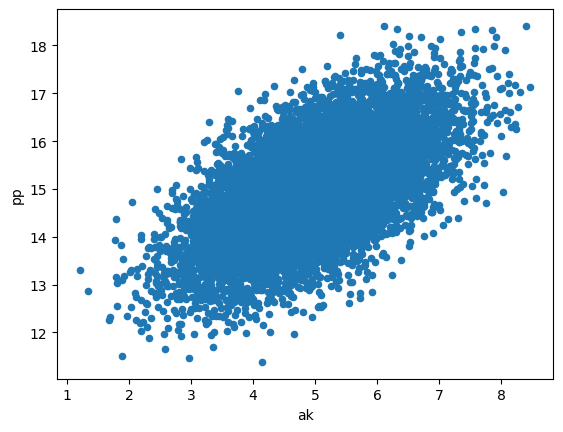

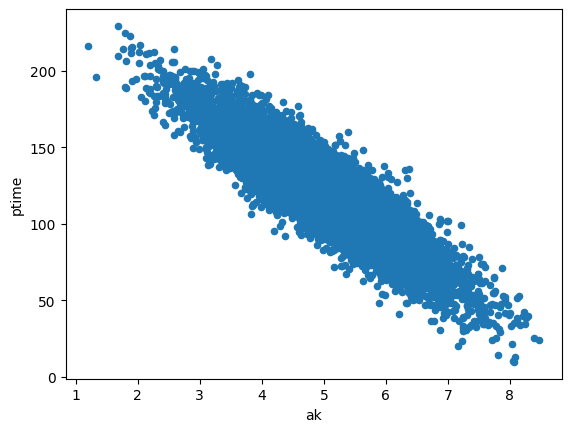

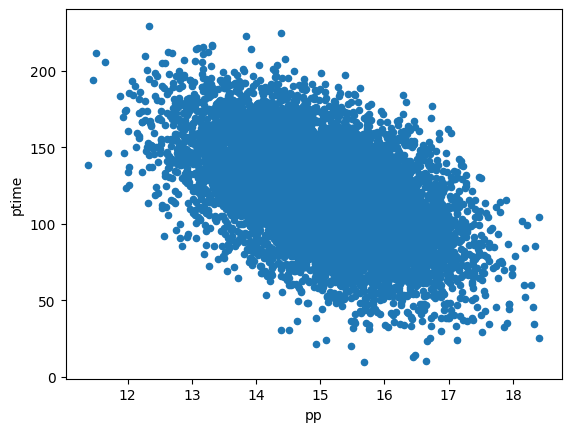

In [ ]:
#Code here

df = pd.DataFrame(data={'ak': ak, 'pp': pp,'ptime': ptime})
df.plot(x='ak', y='pp', kind='scatter')
df.plot(x='ak', y='ptime', kind='scatter')
df.plot(x='pp', y='ptime', kind='scatter')

## Problem 2 (20 points)

You now pretend that the $n=4$ dimensional data you generated in Problem 1 arrive sequentially one at a time (the co-called **online** learning setting). Introduce the index $i$ to represent the ith arriving data sample $\mathbf x_i$.

1. Write the expression of the *sample* correlation matrix (5 points)
2. Write the expression of the sample correlation matrix that can be estimated recursively and plot the elements of the sample correlation matrix from $i=1$ to $i=100$ (15 points)

The equation used for calculating the correlation between two variables is $$y=\frac{\sum_{}^{}(x-\bar{x})(y-\bar{y})}{\sqrt{\sum_{}^{}(x-\bar{x})^2(y-\bar{y})^2}}$$


corr is used to record the correlation matrix and lists named RES hold results over time for each variable relationship. icorr computes the correlation between two variables at a certain index range using the above equation. The results are then stored in a dataframe and display using a pandas plot.

<ipython-input-6-7494f686b2d3>:14: RuntimeWarning: invalid value encountered in double_scalars
  return sum( (a1-aAvg)*(b1-bAvg) ) / math.sqrt( sum(pow((a1-aAvg),2))*sum(pow((b1-bAvg),2)) )


<Axes: >

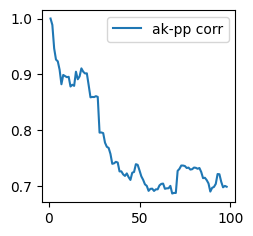

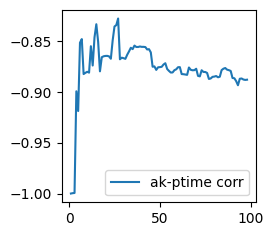

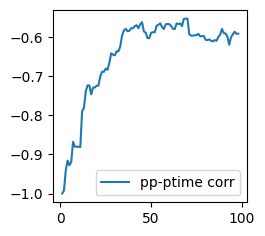

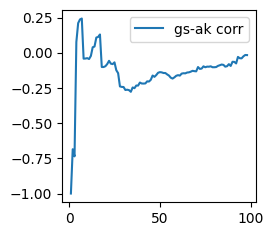

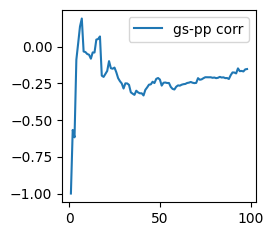

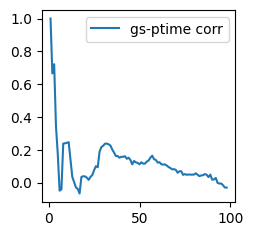

In [ ]:
#Code here

corr =[[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]]

def icorr(a, b, range):
  a1 = a[:range]
  b1 = b[:range]
  aAvg = np.average(a1)
  bAvg = np.average(b1)

  return sum( (a1-aAvg)*(b1-bAvg) ) / math.sqrt( sum(pow((a1-aAvg),2))*sum(pow((b1-bAvg),2)) )

akppRES = []
akptimeRES = []
ppptimeRES = []
gsRES=[[],[],[]]

for i in range(1, 100):
  akpp = icorr(ak, pp, i)
  corr[1][0] = akpp
  corr[0][1] = akpp
  akptime = icorr(ak, ptime, i)
  corr[2][0] = akptime
  corr[0][2] = akptime
  ppptime = icorr(pp, ptime, i)
  corr[1][2] = ppptime
  corr[2][1] = ppptime
  akppRES.append(corr[1][0])
  akptimeRES.append(corr[2][0])
  ppptimeRES.append(corr[1][2])
  gsak = icorr(gs, ak, i)
  gspp = icorr(gs, pp, i)
  gsptime = icorr(gs, ptime, i)
  gsRES[0].append(gsak)
  gsRES[1].append(gspp)
  gsRES[2].append(gsptime)

df = pd.DataFrame(data={'ak-pp corr': akppRES, 'ak-ptime corr': akptimeRES,'pp-ptime corr': ppptimeRES, 'gs-ak corr': gsRES[0], 'gs-pp corr': gsRES[1], 'gs-ptime corr': gsRES[2]})

df.plot(y='ak-pp corr', figsize=(2.5, 2.5))
df.plot(y='ak-ptime corr', figsize=(2.5, 2.5))
df.plot(y='pp-ptime corr', figsize=(2.5, 2.5))
df.plot(y='gs-ak corr', figsize=(2.5, 2.5))
df.plot(y='gs-pp corr', figsize=(2.5, 2.5))
df.plot(y='gs-ptime corr', figsize=(2.5, 2.5))




